In [2]:
#Import pandas, numpy, matplotlib.pyplot, and seaborn, os in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os

# File paths of the downloaded Excel files
file_paths = [
    '../NYC Housing Capstone/RawData/rollingsales_bronx.xlsx',
    '../NYC Housing Capstone/RawData/rollingsales_brooklyn.xlsx',
    '../NYC Housing Capstone/RawData/rollingsales_manhattan.xlsx',
    '../NYC Housing Capstone/RawData/rollingsales_queens.xlsx',
    '../NYC Housing Capstone/RawData/rollingsales_statenisland.xlsx'
]

# List to store the dataframes
dfs = []

# Load each Excel file into a dataframe
for file_path in file_paths:
    df = pd.read_excel(file_path, skiprows=4)  # Skip the first 4 rows (header information)
    dfs.append(df)

# Print the information of each dataframe
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}:")
    print(df.info())
    print("\n")


DataFrame 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6649 entries, 0 to 6648
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         6649 non-null   int64         
 1   NEIGHBORHOOD                    6649 non-null   object        
 2   BUILDING CLASS CATEGORY         6649 non-null   object        
 3   TAX CLASS AT PRESENT            6649 non-null   object        
 4   BLOCK                           6649 non-null   int64         
 5   LOT                             6649 non-null   int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       6649 non-null   object        
 8   ADDRESS                         6649 non-null   object        
 9   APARTMENT NUMBER                600 non-null    object        
 10  ZIP CODE                        6649 non-null   int64      

In [3]:
# Combining dfs
fullNYC_df = pd.concat(dfs, ignore_index=True)

# Print the combined dataframe
print(fullNYC_df.info())
print(fullNYC_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84391 entries, 0 to 84390
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84391 non-null  int64         
 1   NEIGHBORHOOD                    84391 non-null  object        
 2   BUILDING CLASS CATEGORY         84391 non-null  object        
 3   TAX CLASS AT PRESENT            84310 non-null  object        
 4   BLOCK                           84391 non-null  int64         
 5   LOT                             84391 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       84310 non-null  object        
 8   ADDRESS                         84391 non-null  object        
 9   APARTMENT NUMBER                21338 non-null  object        
 10  ZIP CODE                        84384 non-null  float64       
 11  RE

In [4]:
#'EASEMENT' Column has 0 Non-null columns, a closer inspection shows this as a NULL column, which can be dropped. 
# According to the Glossary: An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property.
print(fullNYC_df.iloc[:,6].describe())

#drop the EASEMENT column
fullNYC_df = fullNYC_df.drop("EASEMENT", axis=1)


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: EASEMENT, dtype: float64


In [5]:
# We want to look at the full Dataframe for Null values columns, A quick note: our target column of 'SALE PRICE' has 0 null values.

print(fullNYC_df.isna().sum())

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 81
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT            81
ADDRESS                               0
APARTMENT NUMBER                  63053
ZIP CODE                              7
RESIDENTIAL UNITS                 21247
COMMERCIAL UNITS                  37253
TOTAL UNITS                       18514
LAND SQUARE FEET                  39986
GROSS SQUARE FEET                 39986
YEAR BUILT                         5508
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64


In [6]:
print(fullNYC_df.describe())

            BOROUGH        BLOCK           LOT      ZIP CODE  \
count  84391.000000  84391.00000  84391.000000  84384.000000   
mean       2.939614   4092.93824    404.735600  10842.885997   
std        1.299586   3522.59621    667.369297    568.083809   
min        1.000000      1.00000      1.000000  10001.000000   
25%        2.000000   1237.00000     22.000000  10304.000000   
50%        3.000000   3156.00000     52.000000  11209.000000   
75%        4.000000   6083.50000   1007.000000  11355.000000   
max        5.000000  16350.00000   9105.000000  11697.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  \
count       63144.000000      47138.000000  65877.000000      4.440500e+04   
mean            3.550060          0.309368      3.624148      4.548719e+03   
std            25.911175          6.513464     26.006384      4.410132e+04   
min             0.000000          0.000000      0.000000      0.000000e+00   
25%             1.000000         

In [7]:
#We have a few columns that are categorical data. We should convert their types 

fullNYC_df["BOROUGH"] = fullNYC_df["BOROUGH"].astype("category")
fullNYC_df["TAX CLASS AT TIME OF SALE"] = fullNYC_df["TAX CLASS AT TIME OF SALE"].astype("category")
fullNYC_df["TAX CLASS AT PRESENT"] = fullNYC_df["TAX CLASS AT PRESENT"].astype("category")
fullNYC_df["BUILDING CLASS CATEGORY"] = fullNYC_df["BUILDING CLASS CATEGORY"].astype("category")
fullNYC_df["BUILDING CLASS AT PRESENT"] = fullNYC_df["BUILDING CLASS AT PRESENT"].astype("category")
fullNYC_df["BUILDING CLASS AT TIME OF SALE"] = fullNYC_df["BUILDING CLASS AT TIME OF SALE"].astype("category")
fullNYC_df["ZIP CODE"] = fullNYC_df["ZIP CODE"].astype("category")


print(fullNYC_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84391 entries, 0 to 84390
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84391 non-null  category      
 1   NEIGHBORHOOD                    84391 non-null  object        
 2   BUILDING CLASS CATEGORY         84391 non-null  category      
 3   TAX CLASS AT PRESENT            84310 non-null  category      
 4   BLOCK                           84391 non-null  int64         
 5   LOT                             84391 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84310 non-null  category      
 7   ADDRESS                         84391 non-null  object        
 8   APARTMENT NUMBER                21338 non-null  object        
 9   ZIP CODE                        84384 non-null  category      
 10  RESIDENTIAL UNITS               63144 non-null  float64       
 11  CO

In [8]:
'''A Tax Block is a sub-division of the borough on which real properties are located. 
The Department of Finance uses a Borough-Block-Lot classification to label all real property in the City. 
“Whereas” addresses describe the street location of a property, 
the block and lot distinguishes one unit of real property from another, 
such as the different condominiums in a single building. 
Also, block and lots are not subject to name changes based on which side of the parcel the building puts its entrance on.
'''

# Combine BLOCK and LOT into a new column called BLOCK_LOT
fullNYC_df['BLOCK_LOT'] = fullNYC_df['BLOCK'].astype(str) + '-' + fullNYC_df['LOT'].astype(str)

#Remove BLOCK and LOT columns
#fullNYC_df = fullNYC_df.drop(['BLOCK', 'LOT'], axis=1)


In [9]:
# Compare the values of the two columns
comparison = fullNYC_df['BUILDING CLASS AT PRESENT'] == fullNYC_df['BUILDING CLASS AT TIME OF SALE']

# Print the comparison result
print(comparison.value_counts())


True     83782
False      609
dtype: int64


In [10]:
# Convert categorical columns to strings

tax_class_sale = fullNYC_df['TAX CLASS AT TIME OF SALE'].astype(str)
tax_class_present = fullNYC_df['TAX CLASS AT PRESENT'].astype(str)
tax_class_present_first_letter = tax_class_present.str[0]
#print(tax_class_present_first_letter)

# Compare the values of the two columns, finding buildings that really changed tax class, perhaps through construction
comparison = tax_class_sale != tax_class_present_first_letter

# Filter the DataFrame to get the observations where values are not equal
differences = fullNYC_df[comparison]

# Print the observations where values are not equal
print(differences)



      BOROUGH             NEIGHBORHOOD           BUILDING CLASS CATEGORY  \
585         2     BEDFORD PARK/NORWOOD        05 TAX CLASS 1 VACANT LAND   
812         2                  BELMONT        05 TAX CLASS 1 VACANT LAND   
928         2                BRONXDALE           02 TWO FAMILY DWELLINGS   
1617        2             CROTONA PARK        05 TAX CLASS 1 VACANT LAND   
1797        2                  FORDHAM           02 TWO FAMILY DWELLINGS   
...       ...                      ...                               ...   
72621       4            ROCKAWAY PARK                  44 CONDO PARKING   
72622       4            ROCKAWAY PARK                  44 CONDO PARKING   
72623       4            ROCKAWAY PARK                  44 CONDO PARKING   
72624       4            ROCKAWAY PARK                  44 CONDO PARKING   
80650       5  NEW BRIGHTON-ST. GEORGE  08 RENTALS - ELEVATOR APARTMENTS   

      TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
585               

In [11]:
#Examine 'YEAR BUILT' column for any outliers
print(fullNYC_df['YEAR BUILT'].isna().sum())
print(fullNYC_df['YEAR BUILT'].dtype)


# Filter the DataFrame for NA values in 'YEAR BUILT' column
na_observations = fullNYC_df[fullNYC_df['YEAR BUILT'].isna()]

# Display the NA observations
print(na_observations)



5508
float64
      BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
40          2     BATHGATE  05 TAX CLASS 1 VACANT LAND                   1B   
41          2     BATHGATE  05 TAX CLASS 1 VACANT LAND                   1B   
42          2     BATHGATE  05 TAX CLASS 1 VACANT LAND                   1B   
43          2     BATHGATE  05 TAX CLASS 1 VACANT LAND                   1B   
44          2     BATHGATE  05 TAX CLASS 1 VACANT LAND                   1B   
...       ...          ...                         ...                  ...   
84384       5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
84385       5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
84386       5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   
84387       5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   
84388       5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   

       BLOCK  LOT BUILDING CLASS AT PR

In [12]:
# Check if 'BUILDING CLASS AT PRESENT' contains 'V' for VACANT LAND
contains_v = na_observations['BUILDING CLASS AT PRESENT'].str.contains('V', na=False)

# Filter the NA observations that contain 'V'
na_observations_with_v = na_observations[contains_v]

# Display the filtered observations
print(na_observations_with_v.info())

# Replace 'YEAR BUILT' values with 2025, since these are vacant lands and I'm just using a future year as a placeholder value
fullNYC_df.loc[na_observations_with_v.index, 'YEAR BUILT'] = 2025




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 40 to 84388
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         1065 non-null   category      
 1   NEIGHBORHOOD                    1065 non-null   object        
 2   BUILDING CLASS CATEGORY         1065 non-null   category      
 3   TAX CLASS AT PRESENT            1065 non-null   category      
 4   BLOCK                           1065 non-null   int64         
 5   LOT                             1065 non-null   int64         
 6   BUILDING CLASS AT PRESENT       1065 non-null   category      
 7   ADDRESS                         1065 non-null   object        
 8   APARTMENT NUMBER                0 non-null      object        
 9   ZIP CODE                        1060 non-null   category      
 10  RESIDENTIAL UNITS               1064 non-null   float64       
 11  CO

In [13]:
#Calculate Median year based on BLOCK
median_year_built = fullNYC_df.groupby('BLOCK')['YEAR BUILT'].median()

#Replace the remaining NA 'YEAR BUILT' with median of YEAR BUILT value of BLOCK
fullNYC_df['YEAR BUILT'].fillna(median_year_built, inplace=True)



In [14]:
print(fullNYC_df['YEAR BUILT'].describe())
# Filter the DataFrame to get the observation with YEAR BUILT = 220
year_built_220 = fullNYC_df[fullNYC_df['YEAR BUILT'] == 220]

# Display the information of the observation
print(year_built_220)

# A closer inspection online shows this unit was actually a new built in 2022! Perhaps a typo was made in the data entry.
# Replace the 'YEAR BUILT' value of the observation with 220 to 2022, the min value looks much more accurate.
fullNYC_df.loc[fullNYC_df['YEAR BUILT'] == 220, 'YEAR BUILT'] = 2022


count    80578.000000
mean      1954.042754
std         37.391108
min        220.000000
25%       1925.000000
50%       1950.000000
75%       1983.000000
max       2025.000000
Name: YEAR BUILT, dtype: float64
     BOROUGH NEIGHBORHOOD          BUILDING CLASS CATEGORY  \
7784       3    BAY RIDGE  13 CONDOS - ELEVATOR APARTMENTS   

     TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
7784                    2   6133  1207                        R4   

                     ADDRESS APARTMENT NUMBER ZIP CODE  ...  COMMERCIAL UNITS  \
7784  9956 THIRD AVENUE, 301              301  11209.0  ...               NaN   

      TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
7784          1.0               NaN                NaN       220.0   

      TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE SALE PRICE  \
7784                          2                             R4     890228   

      SALE DATE  BLOCK_LOT  
7784 2022-11-22  6133-1207  

[1 rows x 2

Empty DataFrame
Columns: [RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS]
Index: []


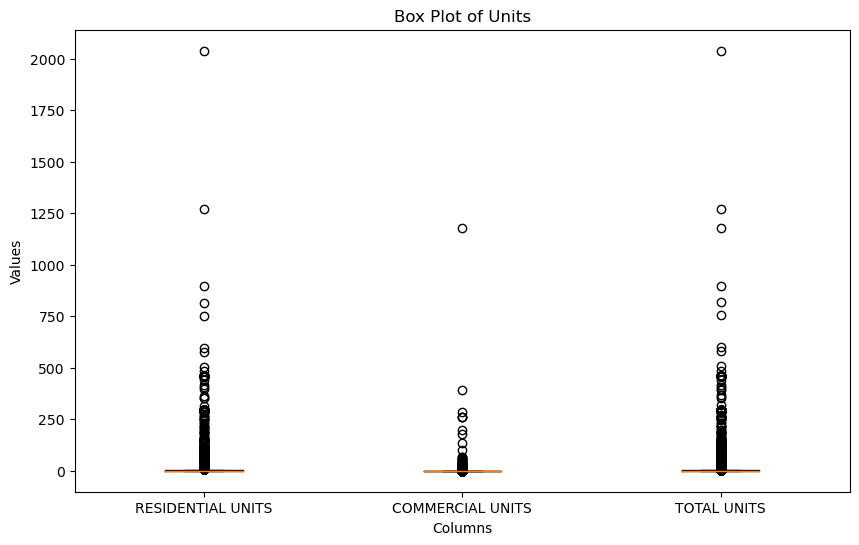

In [15]:
# Replace NULL values with 0 in the specified columns
fullNYC_df['RESIDENTIAL UNITS'] = fullNYC_df['RESIDENTIAL UNITS'].fillna(0)
fullNYC_df['COMMERCIAL UNITS'] = fullNYC_df['COMMERCIAL UNITS'].fillna(0)
fullNYC_df['TOTAL UNITS'] = fullNYC_df['TOTAL UNITS'].fillna(0)

# Create a condition that checks for RESIDENTIAL UNITS + COMMERCIAL UNITS = TOTAL UNITS
condition = (fullNYC_df['RESIDENTIAL UNITS'] + fullNYC_df['COMMERCIAL UNITS']) != fullNYC_df['TOTAL UNITS']
non_matching_units = fullNYC_df[condition]

# Display the filtered DataFrame
print(non_matching_units[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS','TOTAL UNITS']])


# Create box plots for the three columns
plt.figure(figsize=(10, 6))
plt.boxplot([fullNYC_df['RESIDENTIAL UNITS'], fullNYC_df['COMMERCIAL UNITS'], fullNYC_df['TOTAL UNITS']])
plt.xticks([1, 2, 3], ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS'])
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot of Units')
plt.show()



In [16]:
#Looking at the observations where TOTAL UNITS > 500, there are only 9 observations
high_units = fullNYC_df[fullNYC_df['TOTAL UNITS'] > 500]
print(high_units)

# A closer inspection online shows most of these are multi-unit apartments / condos. The only real anomaly is INDEX 68005
# which has 1178 commercial units. But a search reveals that it is a storage post office. This entry should be removed
# since keeping it will skew results.

# Remove the entry with 1178 commercial units
fullNYC_df = fullNYC_df.drop(fullNYC_df[fullNYC_df['TOTAL UNITS'] == 1178].index)


      BOROUGH             NEIGHBORHOOD           BUILDING CLASS CATEGORY  \
449         2               BAYCHESTER  08 RENTALS - ELEVATOR APARTMENTS   
27020       3         PROSPECT HEIGHTS  08 RENTALS - ELEVATOR APARTMENTS   
32149       1                  CLINTON  08 RENTALS - ELEVATOR APARTMENTS   
36916       1              HARLEM-WEST  08 RENTALS - ELEVATOR APARTMENTS   
42201       1              SOUTHBRIDGE     11 SPECIAL CONDO BILLING LOTS   
42899       1  UPPER EAST SIDE (59-79)  08 RENTALS - ELEVATOR APARTMENTS   
68005       4         LONG ISLAND CITY                     30 WAREHOUSES   
68019       4         LONG ISLAND CITY         31 COMMERCIAL VACANT LAND   
68020       4         LONG ISLAND CITY         31 COMMERCIAL VACANT LAND   

      TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
449                      2   4905     1                        D3   
27020                    2   1118     4                        D6   
32149                    2   110

In [17]:
# Replace NULL values in 'APARTMENT NUMBER' with 0
fullNYC_df['APARTMENT NUMBER'] = fullNYC_df['APARTMENT NUMBER'].fillna(0)

# Verify that the NULL values have been replaced
print(fullNYC_df['APARTMENT NUMBER'].isnull().sum())

# Convert 'TAX CLASS AT PRESENT' to string
fullNYC_df['TAX CLASS AT PRESENT'] = fullNYC_df['TAX CLASS AT PRESENT'].astype(str)

# Replace NULL values in 'TAX CLASS AT PRESENT' with values from 'TAX CLASS AT TIME OF SALE'
fullNYC_df['TAX CLASS AT PRESENT'] = fullNYC_df['TAX CLASS AT PRESENT'].fillna(fullNYC_df['TAX CLASS AT TIME OF SALE'])

# Convert 'TAX CLASS AT PRESENT' back to categorical
fullNYC_df['TAX CLASS AT PRESENT'] = fullNYC_df['TAX CLASS AT PRESENT'].astype('category')

# Repeat the same for BUILDING CLASS AT PRESENT
fullNYC_df['BUILDING CLASS AT PRESENT'] = fullNYC_df['BUILDING CLASS AT PRESENT'].astype(str)
fullNYC_df['BUILDING CLASS AT PRESENT'] = fullNYC_df['BUILDING CLASS AT PRESENT'].fillna(fullNYC_df['BUILDING CLASS AT TIME OF SALE'])
fullNYC_df['BUILDING CLASS AT PRESENT'] = fullNYC_df['BUILDING CLASS AT PRESENT'].astype('category')

# Verify that the NULL values have been replaced
print(fullNYC_df['TAX CLASS AT PRESENT'].isnull().sum())



0
0


In [23]:
#Remove entries with NULL ZIP CODE
fullNYC_df.dropna(subset=['ZIP CODE'], inplace=True)

# Calculate the median of 'GROSS SQUARE FEET' and 'LAND SQUARE FEET' grouped by 'BLOCK' 
gsf_block_median = fullNYC_df.groupby(['BLOCK'])['GROSS SQUARE FEET'].transform('median')
lsf_block_median = fullNYC_df.groupby(['BLOCK'])['LAND SQUARE FEET'].transform('median')
# Fill NaN values in 'GROSS SQUARE FEET' with the corresponding group median
fullNYC_df['GROSS SQUARE FEET'].fillna(gsf_block_median, inplace=True)
fullNYC_df['LAND SQUARE FEET'].fillna(lsf_block_median, inplace=True)

# Fill remaining with Calculate the median of 'GROSS SQUARE FEET' and 'LAND SQUARE FEET' grouped by 'Borough'
gsf_borough_median = fullNYC_df.groupby(['BOROUGH'])['GROSS SQUARE FEET'].transform('median')
lsf_borough_median = fullNYC_df.groupby(['BOROUGH'])['LAND SQUARE FEET'].transform('median')
# Fill NaN values in 'GROSS SQUARE FEET' with the corresponding group median
fullNYC_df['GROSS SQUARE FEET'].fillna(gsf_borough_median, inplace=True)
fullNYC_df['LAND SQUARE FEET'].fillna(lsf_borough_median, inplace=True)

# Calculate the median 'YEAR BUILT' within each borough
median_year_built = fullNYC_df.groupby('BOROUGH')['YEAR BUILT'].transform('median')

# Replace the null values in 'YEAR BUILT' with the corresponding borough median
fullNYC_df['YEAR BUILT'].fillna(median_year_built, inplace=True)

fullNYC_df['YEAR BUILT'] = fullNYC_df['YEAR BUILT'].astype(int)

print(fullNYC_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84383 entries, 0 to 84390
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84383 non-null  category      
 1   NEIGHBORHOOD                    84383 non-null  object        
 2   BUILDING CLASS CATEGORY         84383 non-null  category      
 3   TAX CLASS AT PRESENT            84383 non-null  category      
 4   BLOCK                           84383 non-null  int64         
 5   LOT                             84383 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84383 non-null  category      
 7   ADDRESS                         84383 non-null  object        
 8   APARTMENT NUMBER                84383 non-null  object        
 9   ZIP CODE                        84383 non-null  category      
 10  RESIDENTIAL UNITS               84383 non-null  float64       
 11  CO

In [24]:
#Look for observations where TOTAL UNITS = 0 , GROSS SQUARE FEET and LAND SQUARE FEET = 0 and SALES PRICE = 0
zero_units_df = fullNYC_df[(fullNYC_df['TOTAL UNITS'] == 0) & (fullNYC_df['LAND SQUARE FEET'] == 0) & (fullNYC_df['GROSS SQUARE FEET'] == 0) & (fullNYC_df['SALE PRICE'] < 1000)]

filtered_df = fullNYC_df.drop(zero_units_df.index)


In [25]:
#Check <$1000 Sale Price

# A $0 sale indicates that there was a transfer of ownership without a cash consideration. 
# There can be a number of reasons for a $0 sale including transfers of ownership from parents to children.

clean_df = filtered_df[(filtered_df['SALE PRICE'] > 1000)].copy()

print(clean_df.describe())
print(clean_df.tail())

              BLOCK           LOT  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
count  59483.000000  59483.000000       59483.000000      59483.000000   
mean    3856.633795    442.701226           2.797169          0.160869   
std     3454.356751    685.828239          23.993810          2.957205   
min        1.000000      1.000000           0.000000          0.000000   
25%     1171.000000     23.000000           0.000000          0.000000   
50%     2591.000000     55.000000           1.000000          0.000000   
75%     5802.000000   1021.000000           1.000000          0.000000   
max    16350.000000   9105.000000        1272.000000        390.000000   

        TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET    YEAR BUILT  \
count  59483.000000      5.948300e+04       5.948300e+04  59483.000000   
mean       2.958038      4.528431e+03       7.323832e+03   1955.592674   
std       24.215263      4.837100e+04       4.854312e+04     36.683960   
min        0.000000      0.000000e+00

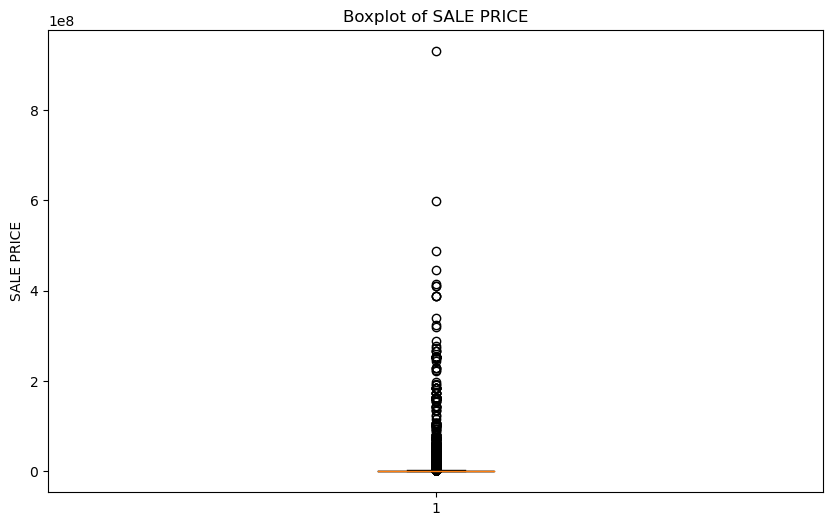

In [26]:
#BOXPLOT of SALE PRICE
plt.figure(figsize=(10, 6))
plt.boxplot(clean_df['SALE PRICE'])
plt.title('Boxplot of SALE PRICE')
plt.ylabel('SALE PRICE')
plt.show()



       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  \
count       59483.000000      59483.000000  59483.000000      5.948300e+04   
mean            2.797169          0.160869      2.958038      4.528431e+03   
std            23.993810          2.957205     24.215263      4.837100e+04   
min             0.000000          0.000000      0.000000      0.000000e+00   
25%             0.000000          0.000000      0.000000      2.000000e+03   
50%             1.000000          0.000000      1.000000      2.492000e+03   
75%             1.000000          0.000000      1.000000      3.600000e+03   
max          1272.000000        390.000000   1272.000000      5.799632e+06   

       GROSS SQUARE FEET    YEAR BUILT    SALE PRICE  
count       5.948300e+04  59483.000000  5.948300e+04  
mean        7.323832e+03   1955.592674  2.409573e+06  
std         4.854312e+04     36.683960  1.323561e+07  
min         0.000000e+00   1800.000000  1.500000e+03  
25%         1.600000e+

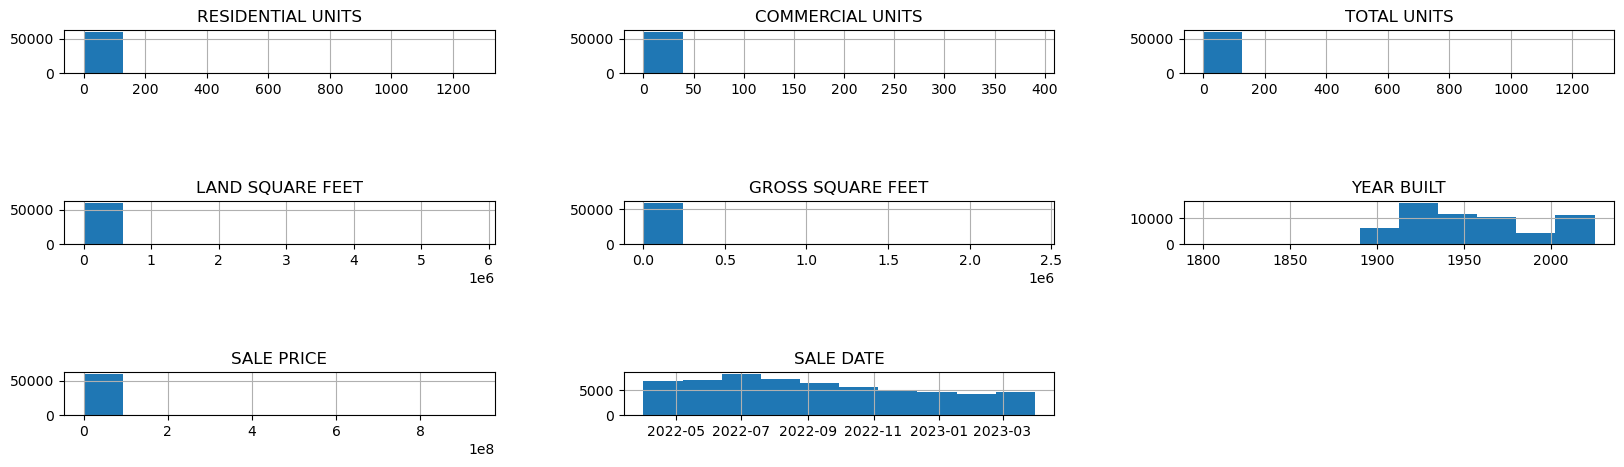

In [27]:
# Convert 'SALE PRICE' column to numeric
clean_df['SALE PRICE'] = pd.to_numeric(clean_df['SALE PRICE'], errors='coerce')
clean_df['BLOCK'] = clean_df['BLOCK'].astype('category')
clean_df['LOT'] = clean_df['LOT'].astype('category')

print(clean_df.describe())

# Review distributions: Note, AREA and SALE PRICE data looks extremely skewed. 
clean_df.hist(figsize=(20, 5))
plt.subplots_adjust(hspace=3);

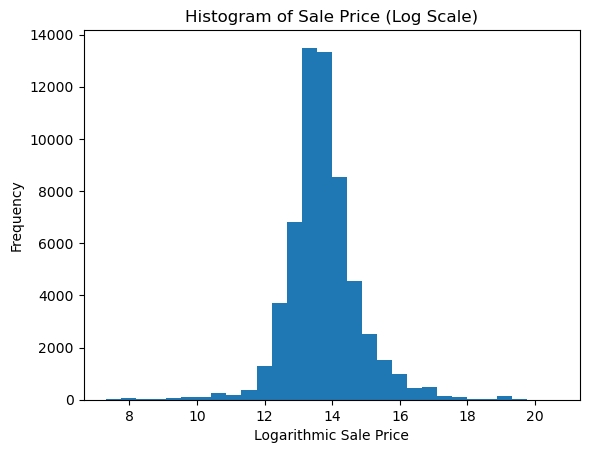

In [28]:
# A few features look extremely skewed - we can apply log transformation to those features and look at the histograms.
# Apply logarithmic transformation to SALE PRICE
clean_df['SALE PRICE_log'] = np.log1p(clean_df['SALE PRICE'])

# Plot histogram of the transformed SALE PRICE
plt.hist(clean_df['SALE PRICE_log'], bins=30)
plt.xlabel('Logarithmic Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Price (Log Scale)')
plt.show()


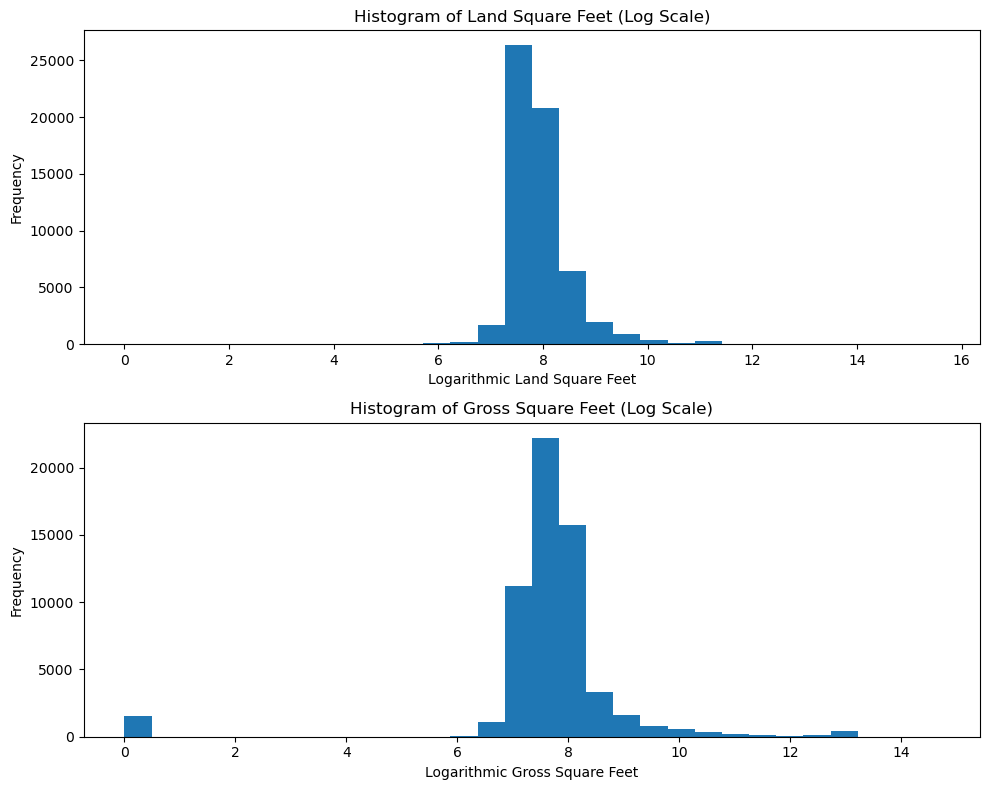

In [29]:
# Note: there will be a large amount of 0 area observations

# Apply logarithmic transformation to LAND SQUARE FEET
clean_df['LAND SQUARE FEET_log'] = np.log1p(clean_df['LAND SQUARE FEET'])

# Apply logarithmic transformation to GROSS SQUARE FEET
clean_df['GROSS SQUARE FEET_log'] = np.log1p(clean_df['GROSS SQUARE FEET'])

# Plot histograms of the transformed variables
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Histogram of LAND SQUARE FEET (Log Scale)
axes[0].hist(clean_df['LAND SQUARE FEET_log'], bins=30)
axes[0].set_xlabel('Logarithmic Land Square Feet')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Land Square Feet (Log Scale)')

# Histogram of GROSS SQUARE FEET (Log Scale)
axes[1].hist(clean_df['GROSS SQUARE FEET_log'], bins=30)
axes[1].set_xlabel('Logarithmic Gross Square Feet')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Gross Square Feet (Log Scale)')

plt.tight_layout()
plt.show()


In [30]:
print(clean_df.shape)

(59483, 24)


In [31]:
#saving the clean data as a separate file

file_path = "../NYC Housing Capstone/CleanData/clean_df.csv"
clean_df.to_csv(file_path, index=False)

